In [1]:
from google.colab import drive
drive.mount('/content/drive')
# folder path
path='/content/drive/My Drive/ECSE 415/Assignment_3/'

Mounted at /content/drive


1.Image Classification with Convolutional Neural-Network

In [1]:
# import and download MNIST digits dataset
# code inspired from https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118
# and from https://nextjournal.com/gkoehler/pytorch-mnist
# to load MNIST data
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
# Load data and normalize
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]),
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [2]:
from torch.utils.data import DataLoader
# load data in batch of 32
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(test_data, batch_size=32,
                                         shuffle=False, num_workers=2)

In [3]:
# code modified from tutorial 7
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # initially we have (28,28,1)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3) # (26,26,32), conv layer 32 kernels, 3x3
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3) # (24,24,32), conv layer 64 kernels
        self.pool = nn.MaxPool2d(2, 2) # (12,12,32) # max pooling, kernel 2x2
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3) # (10,10,64) , conv layer 64 kernels
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3) # (8,8,64), conv layer 64 kernels
        self.fc1 = nn.Linear(4096, 10) # 4096 = 8*8*64 , linear layer output 10
        

    def forward(self, x):
        x = F.relu(self.conv1(x)) # relu activation
        x = F.relu(self.conv2(x))
        x = self.pool(x) # pooling layer
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(-1, 4096) # flattening layer
        x = self.fc1(x)
        return x
net = Net()

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
net.to(device)

cuda


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4096, out_features=10, bias=True)
)

In [6]:
for epoch in range(12):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i == 500: print(i)
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')


[1,   500] loss: 0.830
500
[1,  1000] loss: 0.205
[1,  1500] loss: 0.137
[2,   500] loss: 0.088
500
[2,  1000] loss: 0.084
[2,  1500] loss: 0.080
[3,   500] loss: 0.069
500
[3,  1000] loss: 0.058
[3,  1500] loss: 0.055
[4,   500] loss: 0.045
500
[4,  1000] loss: 0.049
[4,  1500] loss: 0.050
[5,   500] loss: 0.039
500
[5,  1000] loss: 0.041
[5,  1500] loss: 0.041
[6,   500] loss: 0.031
500
[6,  1000] loss: 0.035
[6,  1500] loss: 0.034
[7,   500] loss: 0.027
500
[7,  1000] loss: 0.027
[7,  1500] loss: 0.033
[8,   500] loss: 0.023
500
[8,  1000] loss: 0.031
[8,  1500] loss: 0.025
[9,   500] loss: 0.021
500
[9,  1000] loss: 0.024
[9,  1500] loss: 0.023
[10,   500] loss: 0.021
500
[10,  1000] loss: 0.018
[10,  1500] loss: 0.020
[11,   500] loss: 0.016
500
[11,  1000] loss: 0.018
[11,  1500] loss: 0.018
[12,   500] loss: 0.016
500
[12,  1000] loss: 0.020
[12,  1500] loss: 0.014
Finished Training


In [7]:
# test accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 99 %


2 Segmentation

In [9]:
# From tutorial
import matplotlib.pyplot as plt
import cv2
import numpy as np

name = 'flower.jpeg'
img = cv2.imread(path + name) # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Z represents image as an array of each pixels of RGB
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)


In [10]:
import random
import numpy as np

# method inspired from https://jonchar.net/notebooks/k-means/
# compute euclidean distance
def euclidean_dist(image, centroid):
  return np.linalg.norm(image - centroid, axis=1)

# K- means algorithm
def kMeans(image, k, iterations, shape, gray):
  centroids = np.empty(np.array([image[0]]).shape)
  # find all centroid/cluster points, initiated as random
  for i in range(k):
    num = random.randint(0, image.shape[0])
    point = np.array([image[num]])
    centroids = np.append(centroids, point, axis=0)
  centroids = np.delete(centroids, 0, axis=0)
  # empty arrays to store clusters and distances
  clusters = np.zeros(image.shape[0], dtype=np.float32)
  distances = np.zeros([image.shape[0], k], dtype=np.float32)
  image_copy = np.copy(image)
  # compute distances and find minimum to cluster
  for i in range(iterations):
    for j, centroid in enumerate(centroids):
      distances[:, j] = euclidean_dist(image, centroid)
    clusters = np.argmin(distances, axis=1)
    # update clusters in copy
    for p in range(image.shape[0]):
      image_copy[p] = centroids[clusters[p]]
    image_copy = np.uint8(image_copy)
    # display first 5 iterations
    if i < 5:
      display = image_copy.reshape(shape)
      plt.figure(figsize=(10,10))
      plt.subplot()
      plt.title('Iteration ' + str(i+1) + ", K = " + str(k))
      plt.xticks([]), plt.yticks([])
      if not gray:
        plt.imshow(display)
      else:
        plt.imshow(display, cmap='gray')
      plt.show()
    

    # update new clusters based on mean distance
    for centroid in range(k):
          centroids[centroid] = np.mean(image[clusters == centroid], axis = 0)

  return image_copy



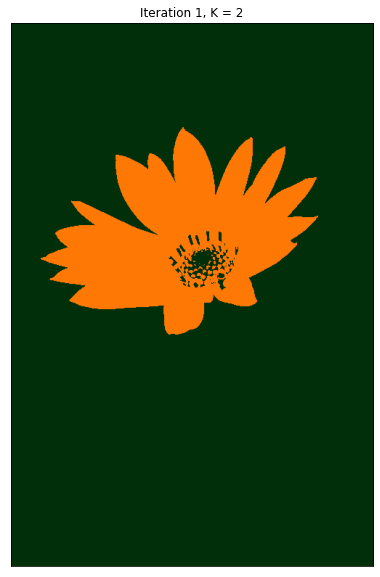

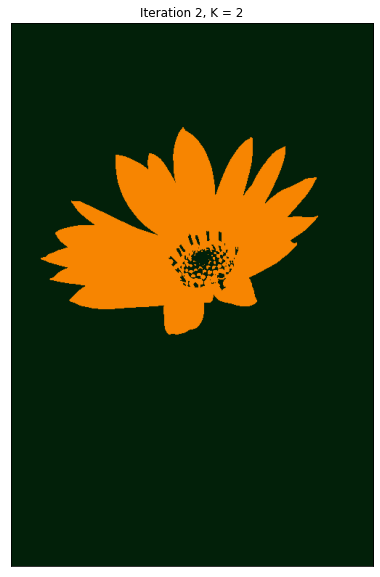

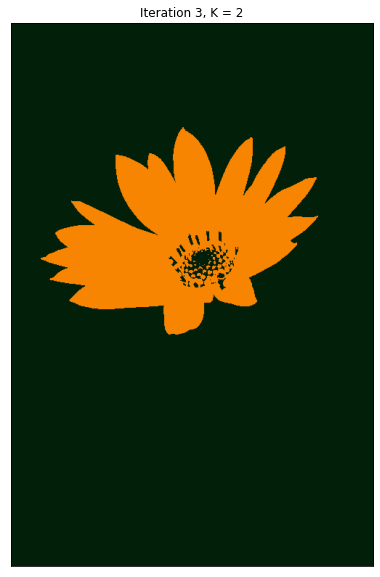

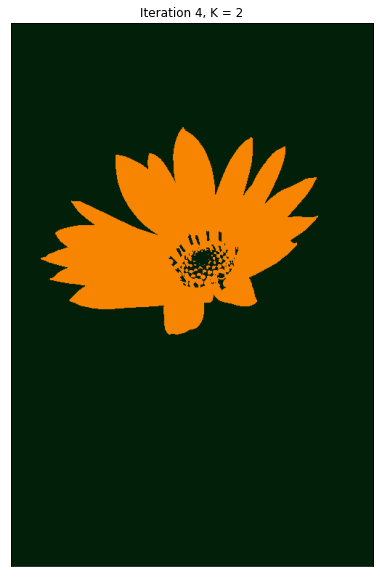

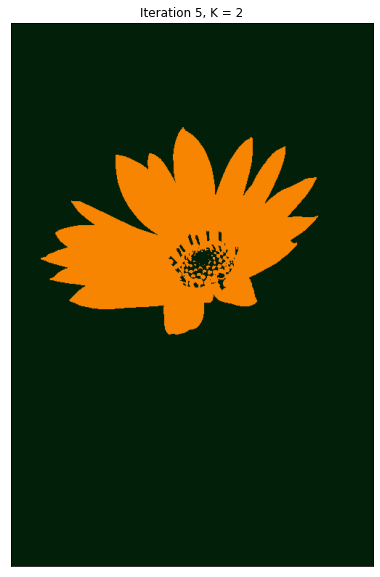

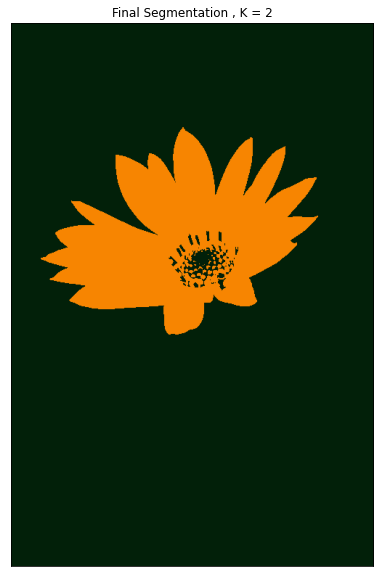

In [11]:
# K means cluster on RGB image, for k =2
iteration = 10
k = 2
test = kMeans(Z, k, iteration, img.shape, False)

test = np.uint8(test)
test = test.reshape(img.shape)
plt.figure(figsize=(10,10))
plt.subplot()
plt.title('Final Segmentation ' + ", K = " + str(k))
plt.xticks([]), plt.yticks([])
plt.imshow(test)
plt.show()


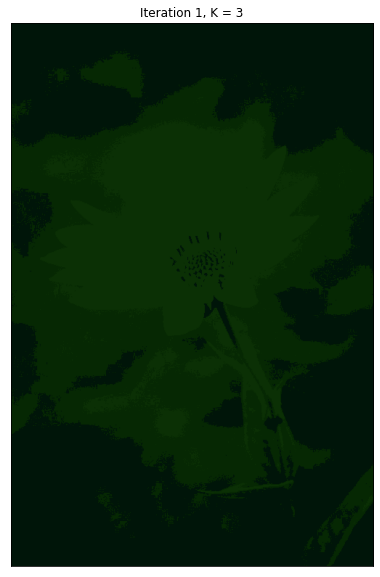

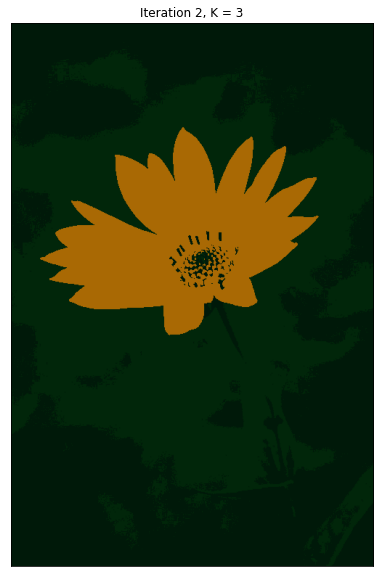

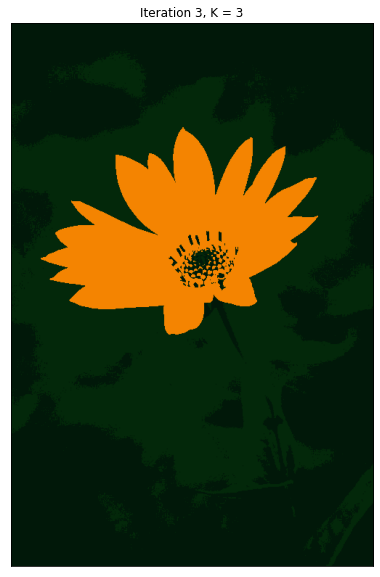

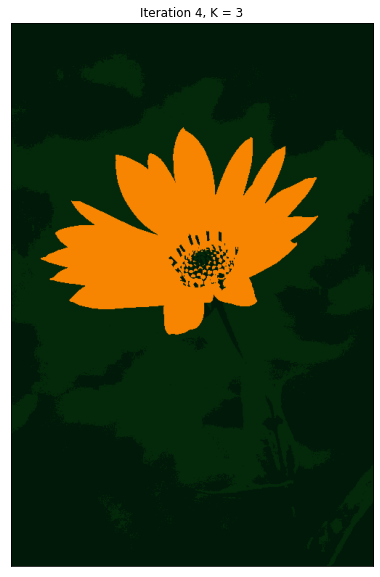

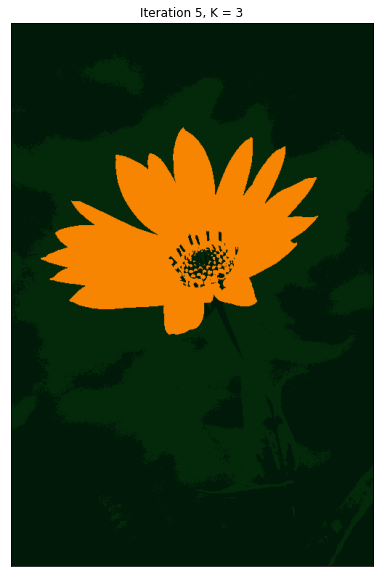

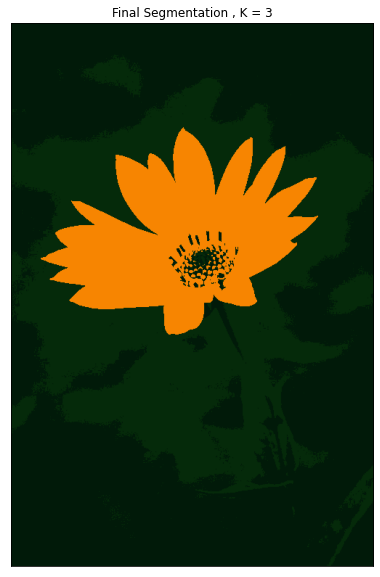

In [12]:
# K means cluster on RGB image, for k = 3
iteration = 10
k = 3
test = kMeans(Z, k, iteration, img.shape, False)

test = np.uint8(test)
test = test.reshape(img.shape)
plt.figure(figsize=(10,10))
plt.subplot()
plt.title('Final Segmentation ' + ", K = " + str(k))
plt.xticks([]), plt.yticks([])
plt.imshow(test)
plt.show()


In [13]:
name = 'flower.jpeg'
img = cv2.imread(path + name) # BGR
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Z represents image as an array of each pixels of RGB
Z_gray = img_gray.reshape((-1,1))

# convert to np.float32
Z_gray = np.float32(Z_gray)


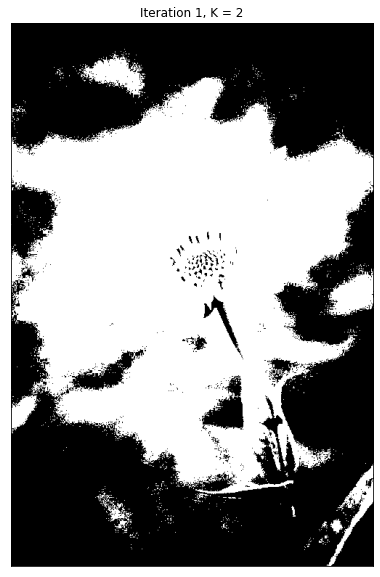

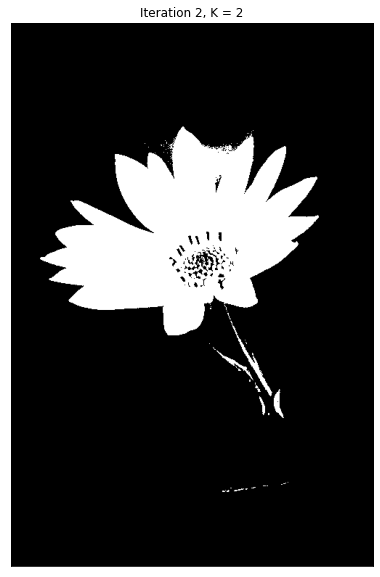

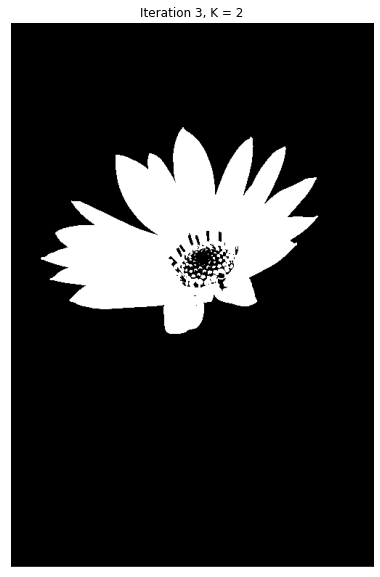

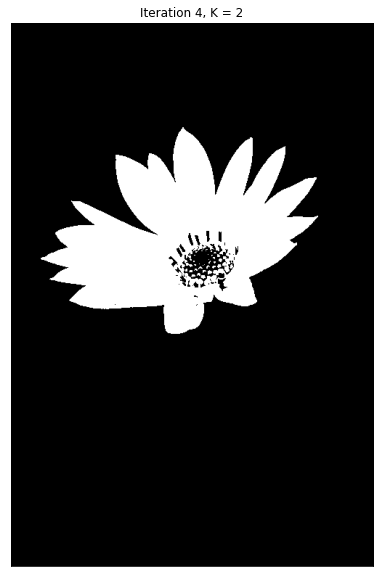

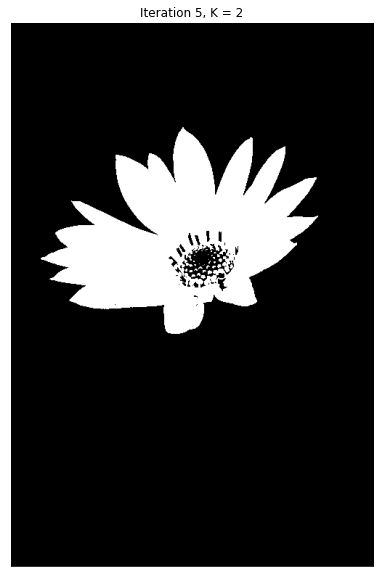

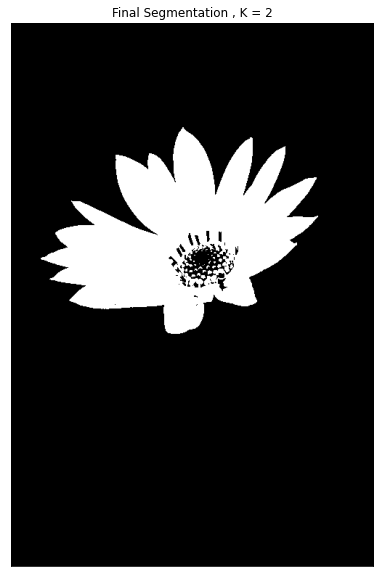

In [14]:
# K means cluster on gray image, for k =2
iteration = 10
k = 2
test = kMeans(Z_gray, k, iteration, img_gray.shape, True)

test = np.uint8(test)
test = test.reshape(img_gray.shape)
plt.figure(figsize=(10,10))
plt.subplot()
plt.title('Final Segmentation ' + ", K = " + str(k))
plt.xticks([]), plt.yticks([])
plt.imshow(test, cmap='gray')
plt.show()


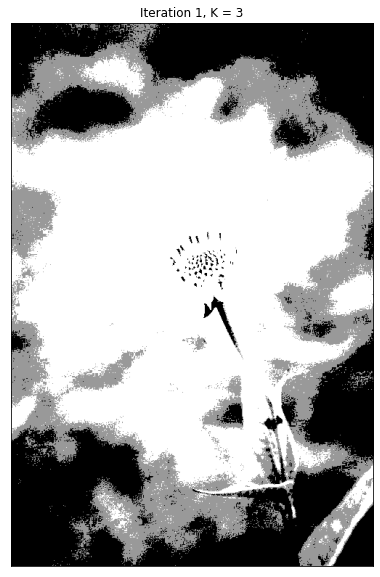

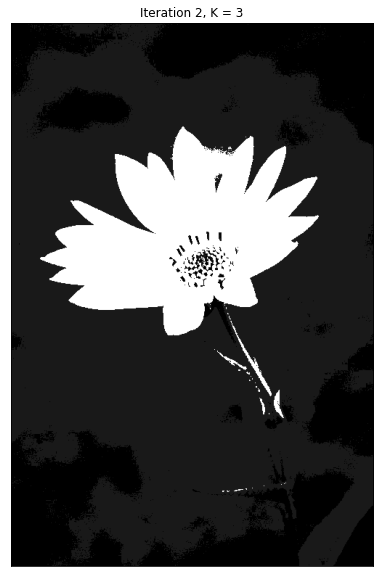

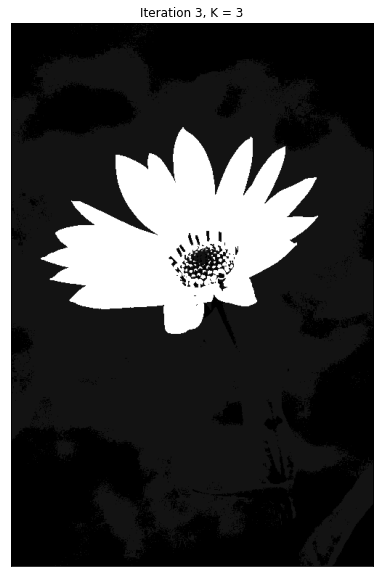

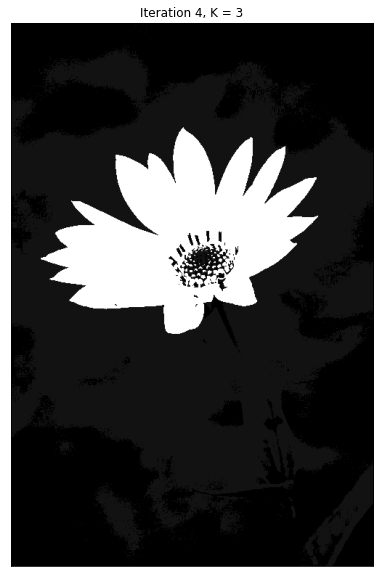

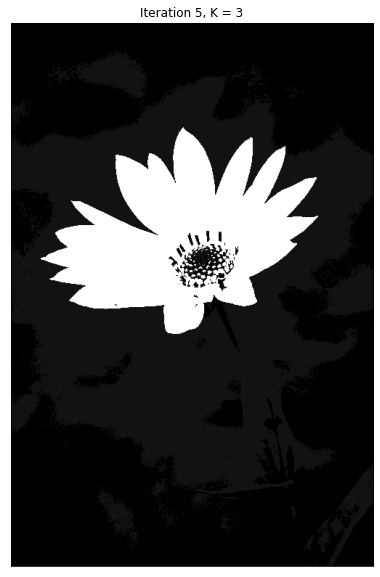

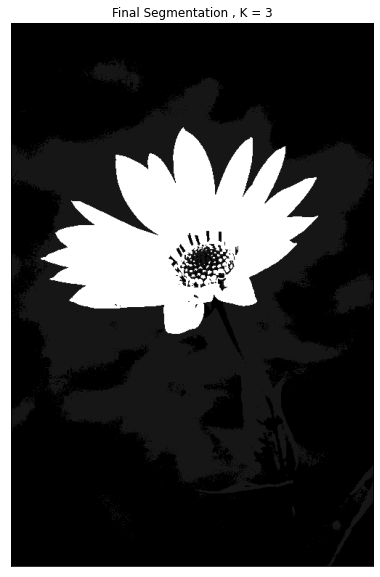

In [15]:
# K means cluster on gray image, for k = 3
iteration = 10
k = 3
test = kMeans(Z_gray, k, iteration, img_gray.shape, True)

test = np.uint8(test)
test = test.reshape(img_gray.shape)
plt.figure(figsize=(10,10))
plt.subplot()
plt.title('Final Segmentation ' + ", K = " + str(k))
plt.xticks([]), plt.yticks([])
plt.imshow(test, cmap='gray')
plt.show()


By comparing the final segmentation maps of color and gray-scale images, we can see that both yield similar segmentation results. However, RGB segmentation maps of color images performs slightly better overall as it always converges to the right clusters. Whereas sometimes, the gray-scale features fail to converge to the right clusters as it shows the pedals belong to a different cluster as the flower. This can be explained by the fact that gray-scale features has less feature space than RGB features to group pixels in different segmentations.

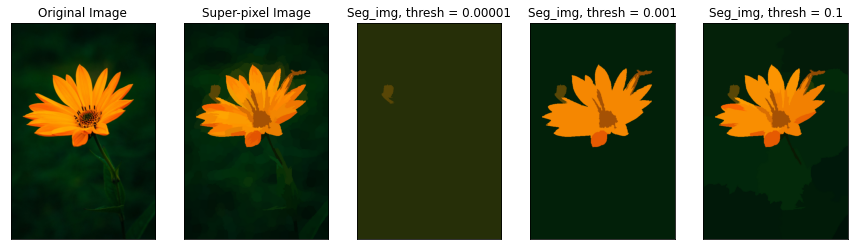

In [38]:
# Normalized Graph-Cuts
# Code taken from tutorial 10
import cv2
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift
from sklearn import mixture

# To supress future warnings, code taken from
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Read image
img = cv2.cvtColor(cv2.imread(path+'flower.jpeg'), cv2.COLOR_BGR2RGB)

# apply k-means. This will generate super pixels
labels1 = segmentation.slic(img, compactness=5, n_segments=500)
out1 = color.label2rgb(labels1, img, kind='avg')
out1 = np.uint8(out1)

# build region adjacency graph
# rag_mean_color(image, labels, connectivity=2, mode='distance', sigma=255.0)
# connectivity: Pixels with a squared distance less than connectivity from each other are considered adjacent.
# mode: {‘distance’, ‘similarity’}
#         ‘distance’ : The weight between two adjacent regions is the |c1−c2| -> max cut?
#         ‘similarity’ : The weight between two adjacent is e−d2/sigma; where d=|c1−c2| -> min cut?
# sigma: Used for computation when mode is “similarity”.
    
g = graph.rag_mean_color(img, labels1, mode='similarity')

# Apply graph cut
# cut_normalized(labels, rag, thresh=0.001, num_cuts=10, in_place=True, max_edge=1.0)
# labels: The array of labels.
# rag: The region adjacency graph.
# thresh: The threshold. A subgraph won’t be further subdivided if the value of the N-cut exceeds thresh.
# num_cuts: The number or N-cuts to perform before determining the optimal one.
# in_place: If set, modifies rag in place.
# max_edge: The maximum possible value of an edge in the RAG.

labels21 = graph.cut_normalized(labels1, g, thresh=0.00001)
out21 = color.label2rgb(labels21, img, kind='avg')
out21 = np.uint8(out21)

labels22 = graph.cut_normalized(labels1, g, thresh=0.001)
out22 = color.label2rgb(labels22, img, kind='avg')
out22 = np.uint8(out22)

labels23 = graph.cut_normalized(labels1, g, thresh=0.1)
out23 = color.label2rgb(labels23, img, kind='avg')
out23 = np.uint8(out23)


# display
plt.figure(figsize=(15,5))
plt.subplot(151), plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(out1)
plt.title("Super-pixel Image"), plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(out21)
plt.title("Seg_img, thresh = 0.00001"), plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(out22)
plt.title("Seg_img, thresh = 0.001"), plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(out23)
plt.title("Seg_img, thresh = 0.1"), plt.xticks([]), plt.yticks([])
plt.show()

The treshold parameter was tried for values ranging from 0.00001 to 0.1. We can see that the higher the value for threshold, the higher the number of clusters in the output image. Aa lower threshold limits the graph-cut value, thus reducing the number of clusters. A threshold of 0.001 seems to work well.

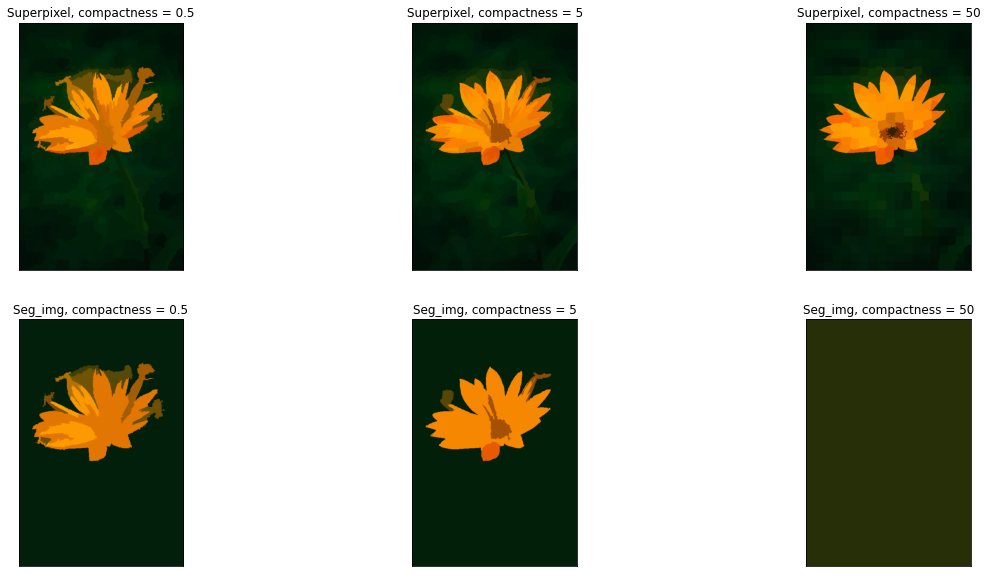

In [17]:
# Normalized Graph-Cuts
# Code taken from tutorial 10
import cv2
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift
from sklearn import mixture

# To supress future warnings, code taken from
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Read image
img = cv2.cvtColor(cv2.imread(path+'flower.jpeg'), cv2.COLOR_BGR2RGB)

# apply k-means. This will generate super pixels
labels11 = segmentation.slic(img, compactness=0.5, n_segments=500)
out11 = color.label2rgb(labels11, img, kind='avg')
out11 = np.uint8(out11)

# apply k-means. This will generate super pixels
labels12 = segmentation.slic(img, compactness=5, n_segments=500)
out12 = color.label2rgb(labels12, img, kind='avg')
out12 = np.uint8(out12)

# apply k-means. This will generate super pixels
labels13 = segmentation.slic(img, compactness=50, n_segments=500)
out13 = color.label2rgb(labels13, img, kind='avg')
out13 = np.uint8(out13)

# build region adjacency graph
# rag_mean_color(image, labels, connectivity=2, mode='distance', sigma=255.0)
# connectivity: Pixels with a squared distance less than connectivity from each other are considered adjacent.
# mode: {‘distance’, ‘similarity’}
#         ‘distance’ : The weight between two adjacent regions is the |c1−c2| -> max cut?
#         ‘similarity’ : The weight between two adjacent is e−d2/sigma; where d=|c1−c2| -> min cut?
# sigma: Used for computation when mode is “similarity”.
    
g1 = graph.rag_mean_color(img, labels11, mode='similarity')
g2 = graph.rag_mean_color(img, labels12, mode='similarity')
g3 = graph.rag_mean_color(img, labels13, mode='similarity')

# Apply graph cut
# cut_normalized(labels, rag, thresh=0.001, num_cuts=10, in_place=True, max_edge=1.0)
# labels: The array of labels.
# rag: The region adjacency graph.
# thresh: The threshold. A subgraph won’t be further subdivided if the value of the N-cut exceeds thresh.
# num_cuts: The number or N-cuts to perform before determining the optimal one.
# in_place: If set, modifies rag in place.
# max_edge: The maximum possible value of an edge in the RAG.

labels21 = graph.cut_normalized(labels11, g1, thresh=0.001)
out21 = color.label2rgb(labels21, img, kind='avg')
out21 = np.uint8(out21)

labels22 = graph.cut_normalized(labels12, g2, thresh=0.001)
out22 = color.label2rgb(labels22, img, kind='avg')
out22 = np.uint8(out22)

labels23 = graph.cut_normalized(labels13, g3, thresh=0.001)
out23 = color.label2rgb(labels23, img, kind='avg')
out23 = np.uint8(out23)


# display
plt.figure(figsize=(20,10))
plt.subplot(231), plt.imshow(out11)
plt.title("Superpixel, compactness = 0.5"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(out12)
plt.title("Superpixel, compactness = 5"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(out13)
plt.title("Superpixel, compactness = 50"), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(out21)
plt.title("Seg_img, compactness = 0.5"), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(out22)
plt.title("Seg_img, compactness = 5"), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(out23)
plt.title("Seg_img, compactness = 50"), plt.xticks([]), plt.yticks([])
plt.show()

The compactness parameter was tried for values ranging from 0.5 to 50. We can see that when the compactness value is high, the superpixel image outputs well defined square-shaped pixalated clusters. When the compactness is low, the superpixel image outputs and ill-defined boundary. Whereas in the segmented image, a low compactness gives blurry clusters, and high compatcness gives nothing at all. A compactness value of 5 seems to give good result in both segmented and superpixel outputs.

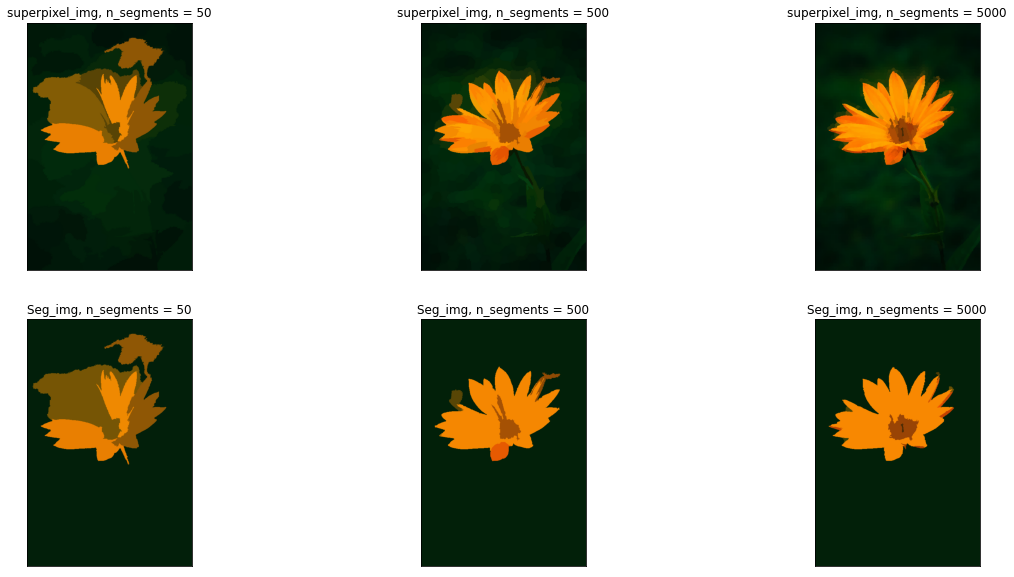

In [39]:
# Normalized Graph-Cuts
# Code taken from tutorial 10
import cv2
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift
from sklearn import mixture

# Read image
img = cv2.cvtColor(cv2.imread(path+'flower.jpeg'), cv2.COLOR_BGR2RGB)

# apply k-means. This will generate super pixels
labels11 = segmentation.slic(img, compactness=5, n_segments=50)
out11 = color.label2rgb(labels11, img, kind='avg')
out11 = np.uint8(out11)

# apply k-means. This will generate super pixels
labels12 = segmentation.slic(img, compactness=5, n_segments=500)
out12 = color.label2rgb(labels12, img, kind='avg')
out12 = np.uint8(out12)

# apply k-means. This will generate super pixels
labels13 = segmentation.slic(img, compactness=5, n_segments=5000)
out13 = color.label2rgb(labels13, img, kind='avg')
out13 = np.uint8(out13)

# build region adjacency graph
# rag_mean_color(image, labels, connectivity=2, mode='distance', sigma=255.0)
# connectivity: Pixels with a squared distance less than connectivity from each other are considered adjacent.
# mode: {‘distance’, ‘similarity’}
#         ‘distance’ : The weight between two adjacent regions is the |c1−c2| -> max cut?
#         ‘similarity’ : The weight between two adjacent is e−d2/sigma; where d=|c1−c2| -> min cut?
# sigma: Used for computation when mode is “similarity”.
    
g1 = graph.rag_mean_color(img, labels11, mode='similarity')
g2 = graph.rag_mean_color(img, labels12, mode='similarity')
g3 = graph.rag_mean_color(img, labels13, mode='similarity')

# Apply graph cut
# cut_normalized(labels, rag, thresh=0.001, num_cuts=10, in_place=True, max_edge=1.0)
# labels: The array of labels.
# rag: The region adjacency graph.
# thresh: The threshold. A subgraph won’t be further subdivided if the value of the N-cut exceeds thresh.
# num_cuts: The number or N-cuts to perform before determining the optimal one.
# in_place: If set, modifies rag in place.
# max_edge: The maximum possible value of an edge in the RAG.

labels21 = graph.cut_normalized(labels11, g1, thresh=0.001)
out21 = color.label2rgb(labels21, img, kind='avg')
out21 = np.uint8(out21)

labels22 = graph.cut_normalized(labels12, g2, thresh=0.001)
out22 = color.label2rgb(labels22, img, kind='avg')
out22 = np.uint8(out22)

labels23 = graph.cut_normalized(labels13, g3, thresh=0.001)
out23 = color.label2rgb(labels23, img, kind='avg')
out23 = np.uint8(out23)


# display
plt.figure(figsize=(20,10))
plt.subplot(231), plt.imshow(out11)
plt.title("superpixel_img, n_segments = 50"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(out12)
plt.title("superpixel_img, n_segments = 500"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(out13)
plt.title("superpixel_img, n_segments = 5000"), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(out21)
plt.title("Seg_img, n_segments = 50"), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(out22)
plt.title("Seg_img, n_segments = 500"), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(out23)
plt.title("Seg_img, n_segments = 5000"), plt.xticks([]), plt.yticks([])
plt.show()

The n_segment parameter was tried for values ranging from 50 to 5000. This parameter seem to affect the number of predicted clusters in the segmented image output. The higher the number of segments, the higher the number of clusters and vice-versa. A segment of 5000 seems to produce good results.

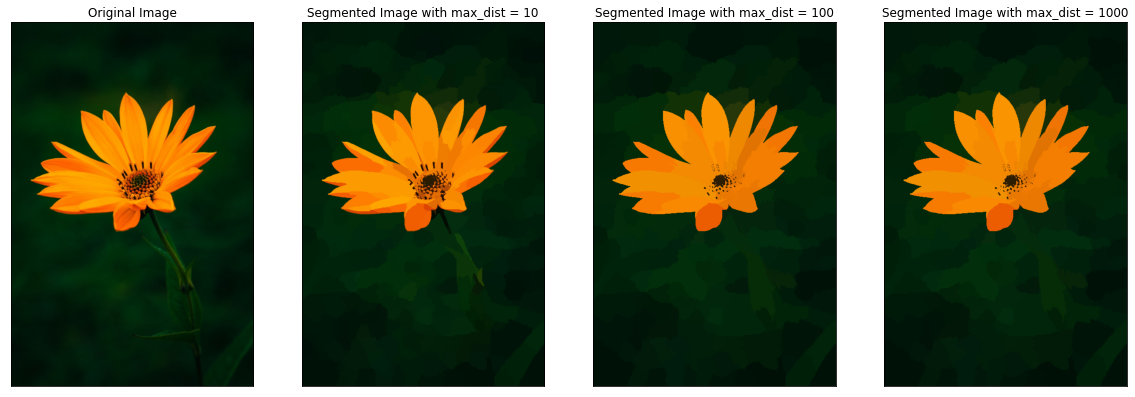

In [19]:
# from tutorial 10
# Read image
img = cv2.cvtColor(cv2.imread(path+'flower.jpeg'), cv2.COLOR_BGR2RGB)

#skimage.segmentation.quickshift(image, ratio=1.0, kernel_size=5, max_dist=10,
#                                return_tree=False, sigma=0, convert2lab=True, random_seed=42)
# image(width, height, channels):Input image.
# ratio: ratio of color-space proximity and image-space proximity.
# kernel_size: Variance of Gaussian kernel used in smoothing the sample density.
# max_dist: Cut-off point for data distances.
# return_tree: Whether to return the full segmentation hierarchy tree and distances.
# sigma: Variance of Gaussian smoothing as preprocessing.
# convert2lab: Whether the input should be converted to Lab colorspace prior to segmentation.
# random_seed: Random seed used for breaking ties

# apply meanshift
label_max10 = quickshift(img, ratio = 1.0, kernel_size=5, max_dist=10)
out_max10 = color.label2rgb(label_max10, img, kind='avg')
out_max10 = np.uint8(out_max10)

# apply meanshift
label_max100 = quickshift(img, ratio = 1.0, kernel_size=5, max_dist=100)
out_max100 = color.label2rgb(label_max100, img, kind='avg')
out_max100 = np.uint8(out_max100)

# apply meanshift
label_max1000 = quickshift(img, ratio = 1.0, kernel_size=5, max_dist=1000)
out_max1000 = color.label2rgb(label_max1000, img, kind='avg')
out_max1000 = np.uint8(out_max1000)

# display
plt.figure(figsize=(20,10))
plt.subplot(141), plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(out_max10)
plt.title("Segmented Image with max_dist = 10"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(out_max100)
plt.title("Segmented Image with max_dist = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(out_max1000)
plt.title("Segmented Image with max_dist = 1000"), plt.xticks([]), plt.yticks([])
plt.show()

The hyper-parameter max_dist were tried for values ranging from 10-1000. We can see that the higher the value for max_dist, the fewer number of clusters were shown. Thus for a high max_dist, we would get fewer clusters. A max_dist value of 1000 seems to work well.

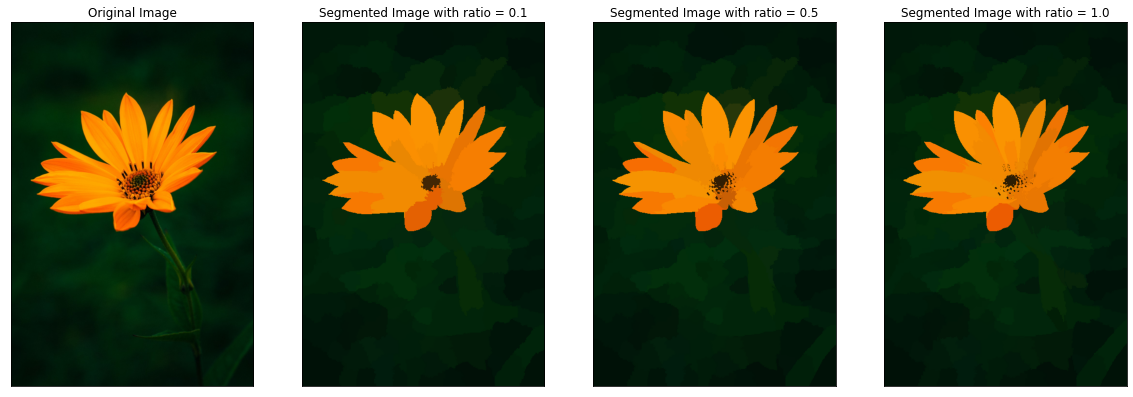

In [20]:
# from tutorial 10
# Read image
img = cv2.cvtColor(cv2.imread(path+'flower.jpeg'), cv2.COLOR_BGR2RGB)

#skimage.segmentation.quickshift(image, ratio=1.0, kernel_size=5, max_dist=10,
#                                return_tree=False, sigma=0, convert2lab=True, random_seed=42)
# image(width, height, channels):Input image.
# ratio: ratio of color-space proximity and image-space proximity.
# kernel_size: Variance of Gaussian kernel used in smoothing the sample density.
# max_dist: Cut-off point for data distances.
# return_tree: Whether to return the full segmentation hierarchy tree and distances.
# sigma: Variance of Gaussian smoothing as preprocessing.
# convert2lab: Whether the input should be converted to Lab colorspace prior to segmentation.
# random_seed: Random seed used for breaking ties

# apply meanshift
label_ratio01 = quickshift(img, ratio = 0.1, kernel_size=5, max_dist=1000)
out_ratio01 = color.label2rgb(label_ratio01, img, kind='avg')
out_ratio01 = np.uint8(out_ratio01)

# apply meanshift
label_ratio05 = quickshift(img, ratio = 0.5, kernel_size=5, max_dist=1000)
out_ratio05 = color.label2rgb(label_ratio05, img, kind='avg')
out_ratio05 = np.uint8(out_ratio05)

# apply meanshift
label_ratio1 = quickshift(img, ratio = 1.0, kernel_size=5, max_dist=1000)
out_ratio1 = color.label2rgb(label_ratio1, img, kind='avg')
out_ratio1 = np.uint8(out_ratio1)

# display
plt.figure(figsize=(20,10))
plt.subplot(141), plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(out_ratio01)
plt.title("Segmented Image with ratio = 0.1"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(out_ratio05)
plt.title("Segmented Image with ratio = 0.5"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(out_ratio1)
plt.title("Segmented Image with ratio = 1.0"), plt.xticks([]), plt.yticks([])
plt.show()

The hyper-parameter ratio were tried for different values ranging from 0-1. From the outputs, we can see that for lower values of ratio, the image become more coarse (more pixelated) and less detailed. For higher values of ratio, the output image clusters are more refined and has more detail. A ratio of 0.5 seems to work well.

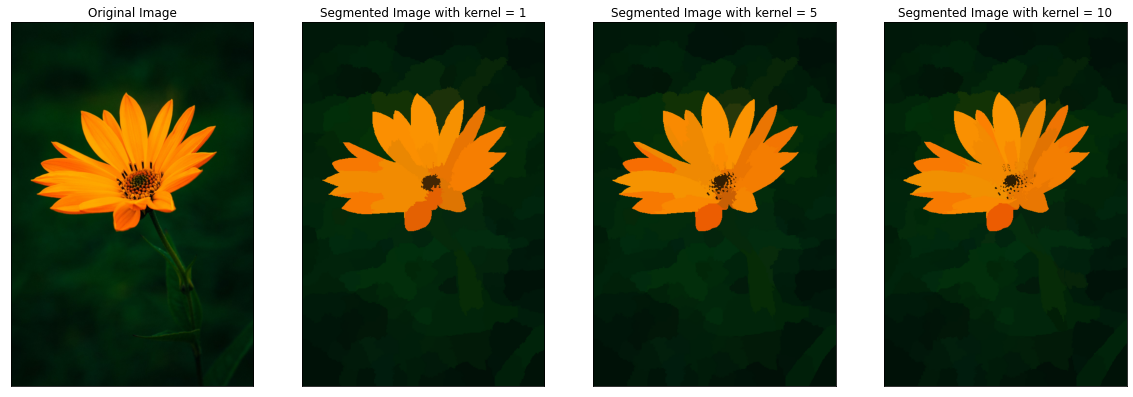

In [21]:

# Read image
img = cv2.cvtColor(cv2.imread(path+'flower.jpeg'), cv2.COLOR_BGR2RGB)

#skimage.segmentation.quickshift(image, ratio=1.0, kernel_size=5, max_dist=10,
#                                return_tree=False, sigma=0, convert2lab=True, random_seed=42)
# image(width, height, channels):Input image.
# ratio: ratio of color-space proximity and image-space proximity.
# kernel_size: Variance of Gaussian kernel used in smoothing the sample density.
# max_dist: Cut-off point for data distances.
# return_tree: Whether to return the full segmentation hierarchy tree and distances.
# sigma: Variance of Gaussian smoothing as preprocessing.
# convert2lab: Whether the input should be converted to Lab colorspace prior to segmentation.
# random_seed: Random seed used for breaking ties

# apply meanshift
label_kernel1 = quickshift(img, ratio = 0.5, kernel_size=1, max_dist=1000)
out_kernel1 = color.label2rgb(label_kernel1, img, kind='avg')
out_kernel1 = np.uint8(out_ratio01)

# apply meanshift
label_kernel5 = quickshift(img, ratio = 0.5, kernel_size=5, max_dist=1000)
out_kernel5 = color.label2rgb(label_kernel5, img, kind='avg')
out_kernel5 = np.uint8(out_kernel5)

# apply meanshift
label_kernel10 = quickshift(img, ratio = 0.5, kernel_size=10, max_dist=1000)
out_kernel10 = color.label2rgb(label_kernel10, img, kind='avg')
out_kernel10 = np.uint8(out_kernel10)

# display
plt.figure(figsize=(20,10))
plt.subplot(141), plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(out_ratio01)
plt.title("Segmented Image with kernel = 1"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(out_ratio05)
plt.title("Segmented Image with kernel = 5"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(out_ratio1)
plt.title("Segmented Image with kernel = 10"), plt.xticks([]), plt.yticks([])
plt.show()

The hyper-parameter kernel_size were tried for values ranging from 1-10. The kernel_size plays a similar role as the max_dist parameter. As this parameter is used to determine the width of the Gaussian used in this algorithm to smooth the image, a high value of kernel_size leads to fewer number of clusters in the output. The resulting image clusters seems more defined as the kernel_size increases as well. A kernel_size of 10 seems to work well.

In [7]:
# from tutorial 10, import libraries and install opencv version
!pip install opencv-python==4.4.0.44
!pip install opencv-contrib-python==4.4.0.44
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Read images
imgL = cv2.imread(path+"aloeL.jpg");
imgR = cv2.imread(path+"aloeR.jpg");

# resize images to 0.3 & grayscale image
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)
imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)


In [9]:
# https://stackoverflow.com/questions/2284611/sum-of-square-differences-ssd-in-numpy-scipy
# implementation inspired from
def SSD(block1, block2):
  # check if shape matches
  if block1.shape != block2.shape:
      return -1
  # compute SSD 
  dif = block1 - block2
  return np.sum((dif)**2)

In [10]:
# code inspired from https://pramodatre.github.io/2020/05/17/stereo-vision-exploration/

    # """
    # Compare left block of pixels with multiple blocks from the right
    # image using SEARCH_BLOCK_SIZE to constrain the search in the right
    # image.

    # Args:
    #     y (int): row index of the left block
    #     x (int): column index of the left block
    #     block_left (numpy.ndarray): containing pixel values within the 
    #                 block selected from the left image
    #     right_array (numpy.ndarray]): containing pixel values for the 
    #                  entrire right image
    #     block_size (int, optional): Block of pixels width and height. 
    #                                 Defaults to 5.

    # Returns:
    #     tuple: (y, x) row and column index of the best matching block 
    #             in the right image
    # """
def compare_blocks(y, x, left_img, right_img):
    temp = True
    min_sad = None
    min_index = None
    costs = np.zeros(48)
    for i in range(47,0,-1):
    # edge cases
        if (x - i - 2 < 0 or x - 2 < 0 or y - 2 < 0) :
          continue
        # Extract window size = 5
        else:
          block_right = right_img[y - 2 : y + 2,
                                  x - i - 2 : x - i + 2]
          block_left = left_img[y - 2 : y + 2,
                                x - 2 : x + 2]
          ssd = SSD(block_left, block_right)
          costs[i] = ssd
          if temp:
            min_sad = ssd
            min_index = (y, x - i)
            temp = False
          else:
             if ssd < min_sad:
                  min_sad = ssd
                  min_index = (y, x - i)

    return min_index, costs



In [11]:
# compute disparity map
# get dimensions of imgL_gray
rows, cols = imgL_gray.shape
disparity_map = np.ones((rows, cols))
# search region contained in 48 pixel locations
costs = np.ones(48)

# iterate through each left image window and compute disparity
for j in range(rows):
        for i in range(cols):
            if ((i - 2 - 48) < 0 or j - 2 < 0):
              # For few boarder pixel-locations either the reference window or 
              # the search region lie outside the boundary of the image, disparity = 48
                disparity_map[j, i] = 48
                continue
            else:
                min , cost = compare_blocks(j, i, imgL_gray, imgR_gray)
                if min[1] - i > 0:
                  disparity_map[j, i] = min[1] - i
                else:
                  disparity_map[j, i] = (min[1] - i) * -1

min , cost = compare_blocks(80, 90, imgL_gray, imgR_gray)
costs = cost



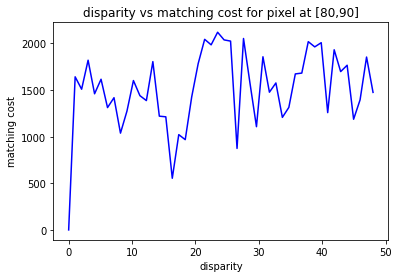

In [16]:
# disparity vs SSD matching cost for one pixel
disparity = np.linspace(0, 48, num=48)
plt.plot(disparity, costs, color = 'blue')
plt.title('disparity vs matching cost for pixel at [80,90]')
plt.xlabel('disparity')
plt.ylabel('matching cost')
plt.show()

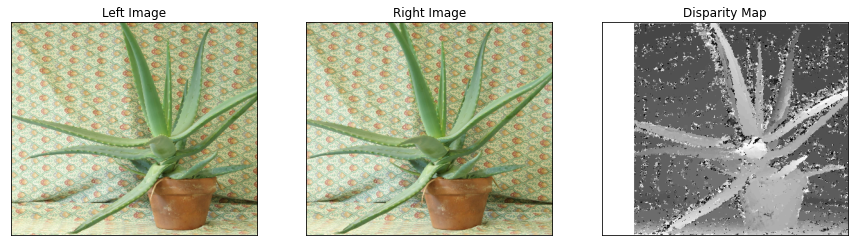

In [13]:
# From tutorial 10
# display images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity_map, cmap="gray")
plt.title("Disparity Map"), plt.xticks([]), plt.yticks([])
plt.show()

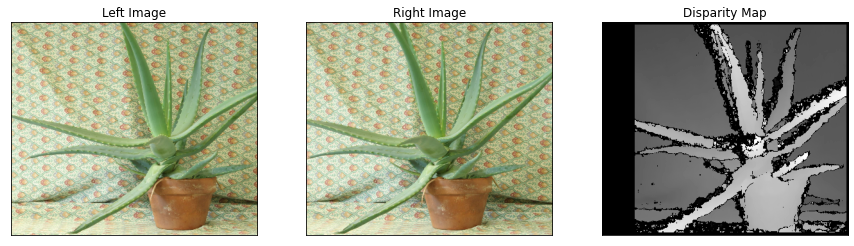

In [14]:
# From Tutorial 10
# results look a little different from stereo from scratch by tuning hyper-parameters from stereo library
stereo = cv2.StereoBM_create(numDisparities=16*3, blockSize=9) #stereo correspondence using the block matching algorithm
disparity = stereo.compute(imgL_gray, imgR_gray)

# display images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity, cmap="gray")
plt.title("Disparity Map"), plt.xticks([]), plt.yticks([])
plt.show()